<a href="https://colab.research.google.com/github/yadgire7/Machine-Learning/blob/master/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Saurabh Arun Yadgire USC ID: 8065527198 Github ID:yadgire7

Resources:
1. https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/
2. https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/
3. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
4. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
5. https://koalatea.io/sklearn-decision-random-forest-imbalanced-classes/
6. https://stackoverflow.com/questions/20082674/unbalanced-classification-using-randomforestclassifier-in-sklearn
7. https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
8. https://machinelearningmastery.com/xgboost-for-regression/
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
9. https://stackoverflow.com/questions/67080149/xgboost-error-when-categorical-type-is-supplied-dmatrix-parameter-enable-cat
10. https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier


In [ ]:
# pip install imbalanced-learn

# Import libraries

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn import tree,metrics
from sklearn.model_selection import cross_val_score,KFold,RepeatedKFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_roc_curve,roc_curve,auc
from sklearn.linear_model import LassoCV
import regex
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier,XGBRegressor
import warnings


# Read file

In [ ]:
print('Q.1.a Completed\n')
train = pd.read_csv(r"../Data/aps_train.csv")
test = pd.read_csv(r"../Data/aps_test.csv")
test
# train

Q.1.a Completed



,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,na,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,neg,79636,na,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,neg,110,na,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


In [ ]:
print('Q.1.b.i\n')


Q.1.b.i



There are 2 ways of handling missing values:
1. Deleting the missing data
2. Imputing the missing data
Deleting the missing data would reduce the size of our training data. If the proportion of missing data to available data is more, then this technique cannot(should) not be used

2. Imputing the missing data:
There are various techniques of imputing data:
    - Replacing with arbitrary value (zero):
    - Replacing with mean
    - Replacing with mode
    - Replacing with median
    - Forward fill (replacing with previous value) : This is most commonly used in time-series data
    - Backward fill (replacing with next value)
    - Interpolation
****************************
Forward Fill and then replacig with zero has been used in this homework to handle missing data('na').

In [ ]:
cols = train.columns
print(cols)
cols = cols[1:]
print(cols)

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)
Index(['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000',
       'ag_001', 'ag_002', 'ag_003',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=170)


In [ ]:
train=train.replace('na',np.nan)
test=test.replace('na',np.nan)
# print(train)
print(test)

      class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg      60      0          20     12      0      0      0      0   
1       neg      82      0          68     40      0      0      0      0   
2       neg   66002      2         212    112      0      0      0      0   
3       neg   59816    NaN        1010    936      0      0      0      0   
4       neg    1814    NaN         156    140      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
15995   neg   81852    NaN  2130706432    892      0      0      0      0   
15996   neg      18      0          52     46      8     26      0      0   
15997   neg   79636    NaN        1670   1518      0      0      0      0   
15998   neg     110    NaN          36     32      0      0      0      0   
15999   neg       8      0           6      4      2      2      0      0   

      ag_002  ...  ee_002  ee_003  ee_004  ee_005   ee_006  ee_007  ee_008 

In [ ]:
train=train.fillna(method='ffill')   # using forward fill initially
train=train.fillna(0)                # and then filling the remaining NaN with O
test=test.fillna(method='ffill')   # using forward fill initially
test=test.fillna(0)                # and then filling the remaining NaN with O

In [ ]:
# train
test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,2,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,2,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,0,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,neg,79636,0,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,neg,110,0,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


In [ ]:
for col in cols:
    train[col]=(train[col]).astype(float)


In [ ]:
print('Q.1.b.ii\n')
coef_var = train.std()/train.mean()
print(coef_var)

Q.1.b.ii

aa_000      2.450938
ab_000      4.255651
ac_000      2.228866
ad_000    244.196147
ae_000     24.056913
             ...    
ee_007      4.986778
ee_008      3.238764
ee_009      5.653155
ef_000     49.104779
eg_000     42.247730
Length: 170, dtype: float64


Q.1.b.iii



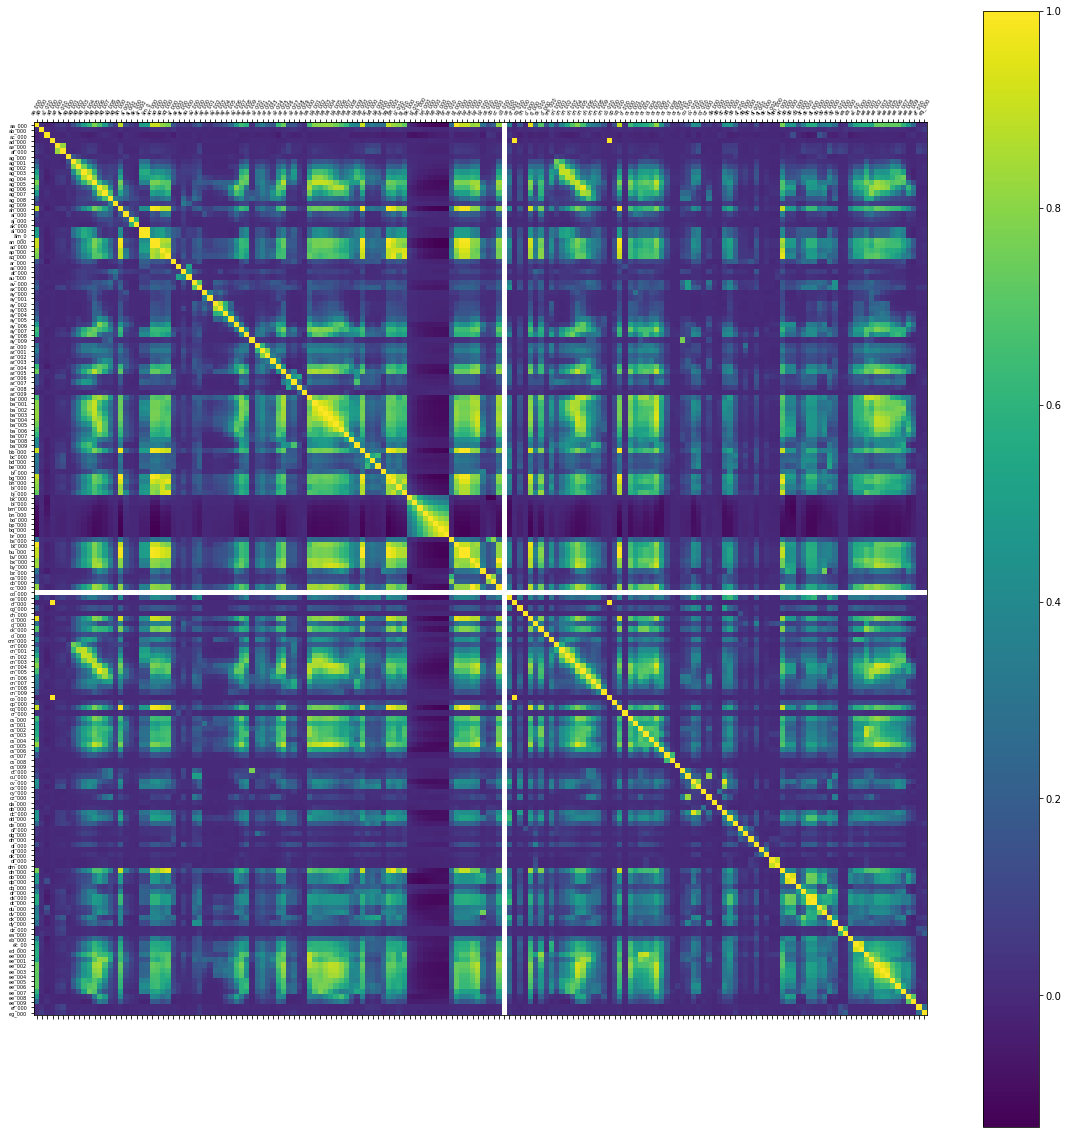

In [ ]:
print('Q.1.b.iii\n')
fig = plt.figure(figsize=(20,20))
plt.matshow(train.corr(),fignum=fig.number)
plt.xticks(range(len(cols)),cols,fontsize=5,rotation=60)
plt.yticks(range(len(cols)),cols,fontsize=5,rotation=0)
colors= plt.colorbar()
plt.show()

In [ ]:
print('')
df = pd.DataFrame(coef_var)
df = df.reset_index()
df = df.rename(columns={'index':'feature',0:'CV'})
df = df.sort_values(by="CV",ascending=False).reset_index(drop=True)
print(df)


    feature          CV
0    cf_000  244.870175
1    co_000  244.367926
2    ad_000  244.196147
3    cs_009  237.607548
4    dh_000  117.914950
..      ...         ...
165  bk_000    0.926899
166  bq_000    0.916072
167  cb_000    0.910623
168  br_000    0.900713
169  cd_000    0.000000

[170 rows x 2 columns]


In [ ]:
print('Q.1.b.iv\n')
highest_cv = int(170**0.5)
df = df.loc[:highest_cv-1,:]
temp_cols = df['feature'].values

Q.1.b.iv



In [ ]:
temp_df = train[temp_cols]
temp_df.insert(len(temp_df.columns),'class',train['class'])
temp_df

,cf_000,co_000,ad_000,cs_009,dh_000,dj_000,ag_000,as_000,ay_009,ak_000,az_009,ch_000,au_000,class
0,2.0,220.0,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
1,2.0,220.0,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
2,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
3,2.0,2.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
4,0.0,202.0,458.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,224.0,186.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
59996,2.0,0.0,224.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
59997,2.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
59998,2.0,580.0,494.0,0.0,190.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg


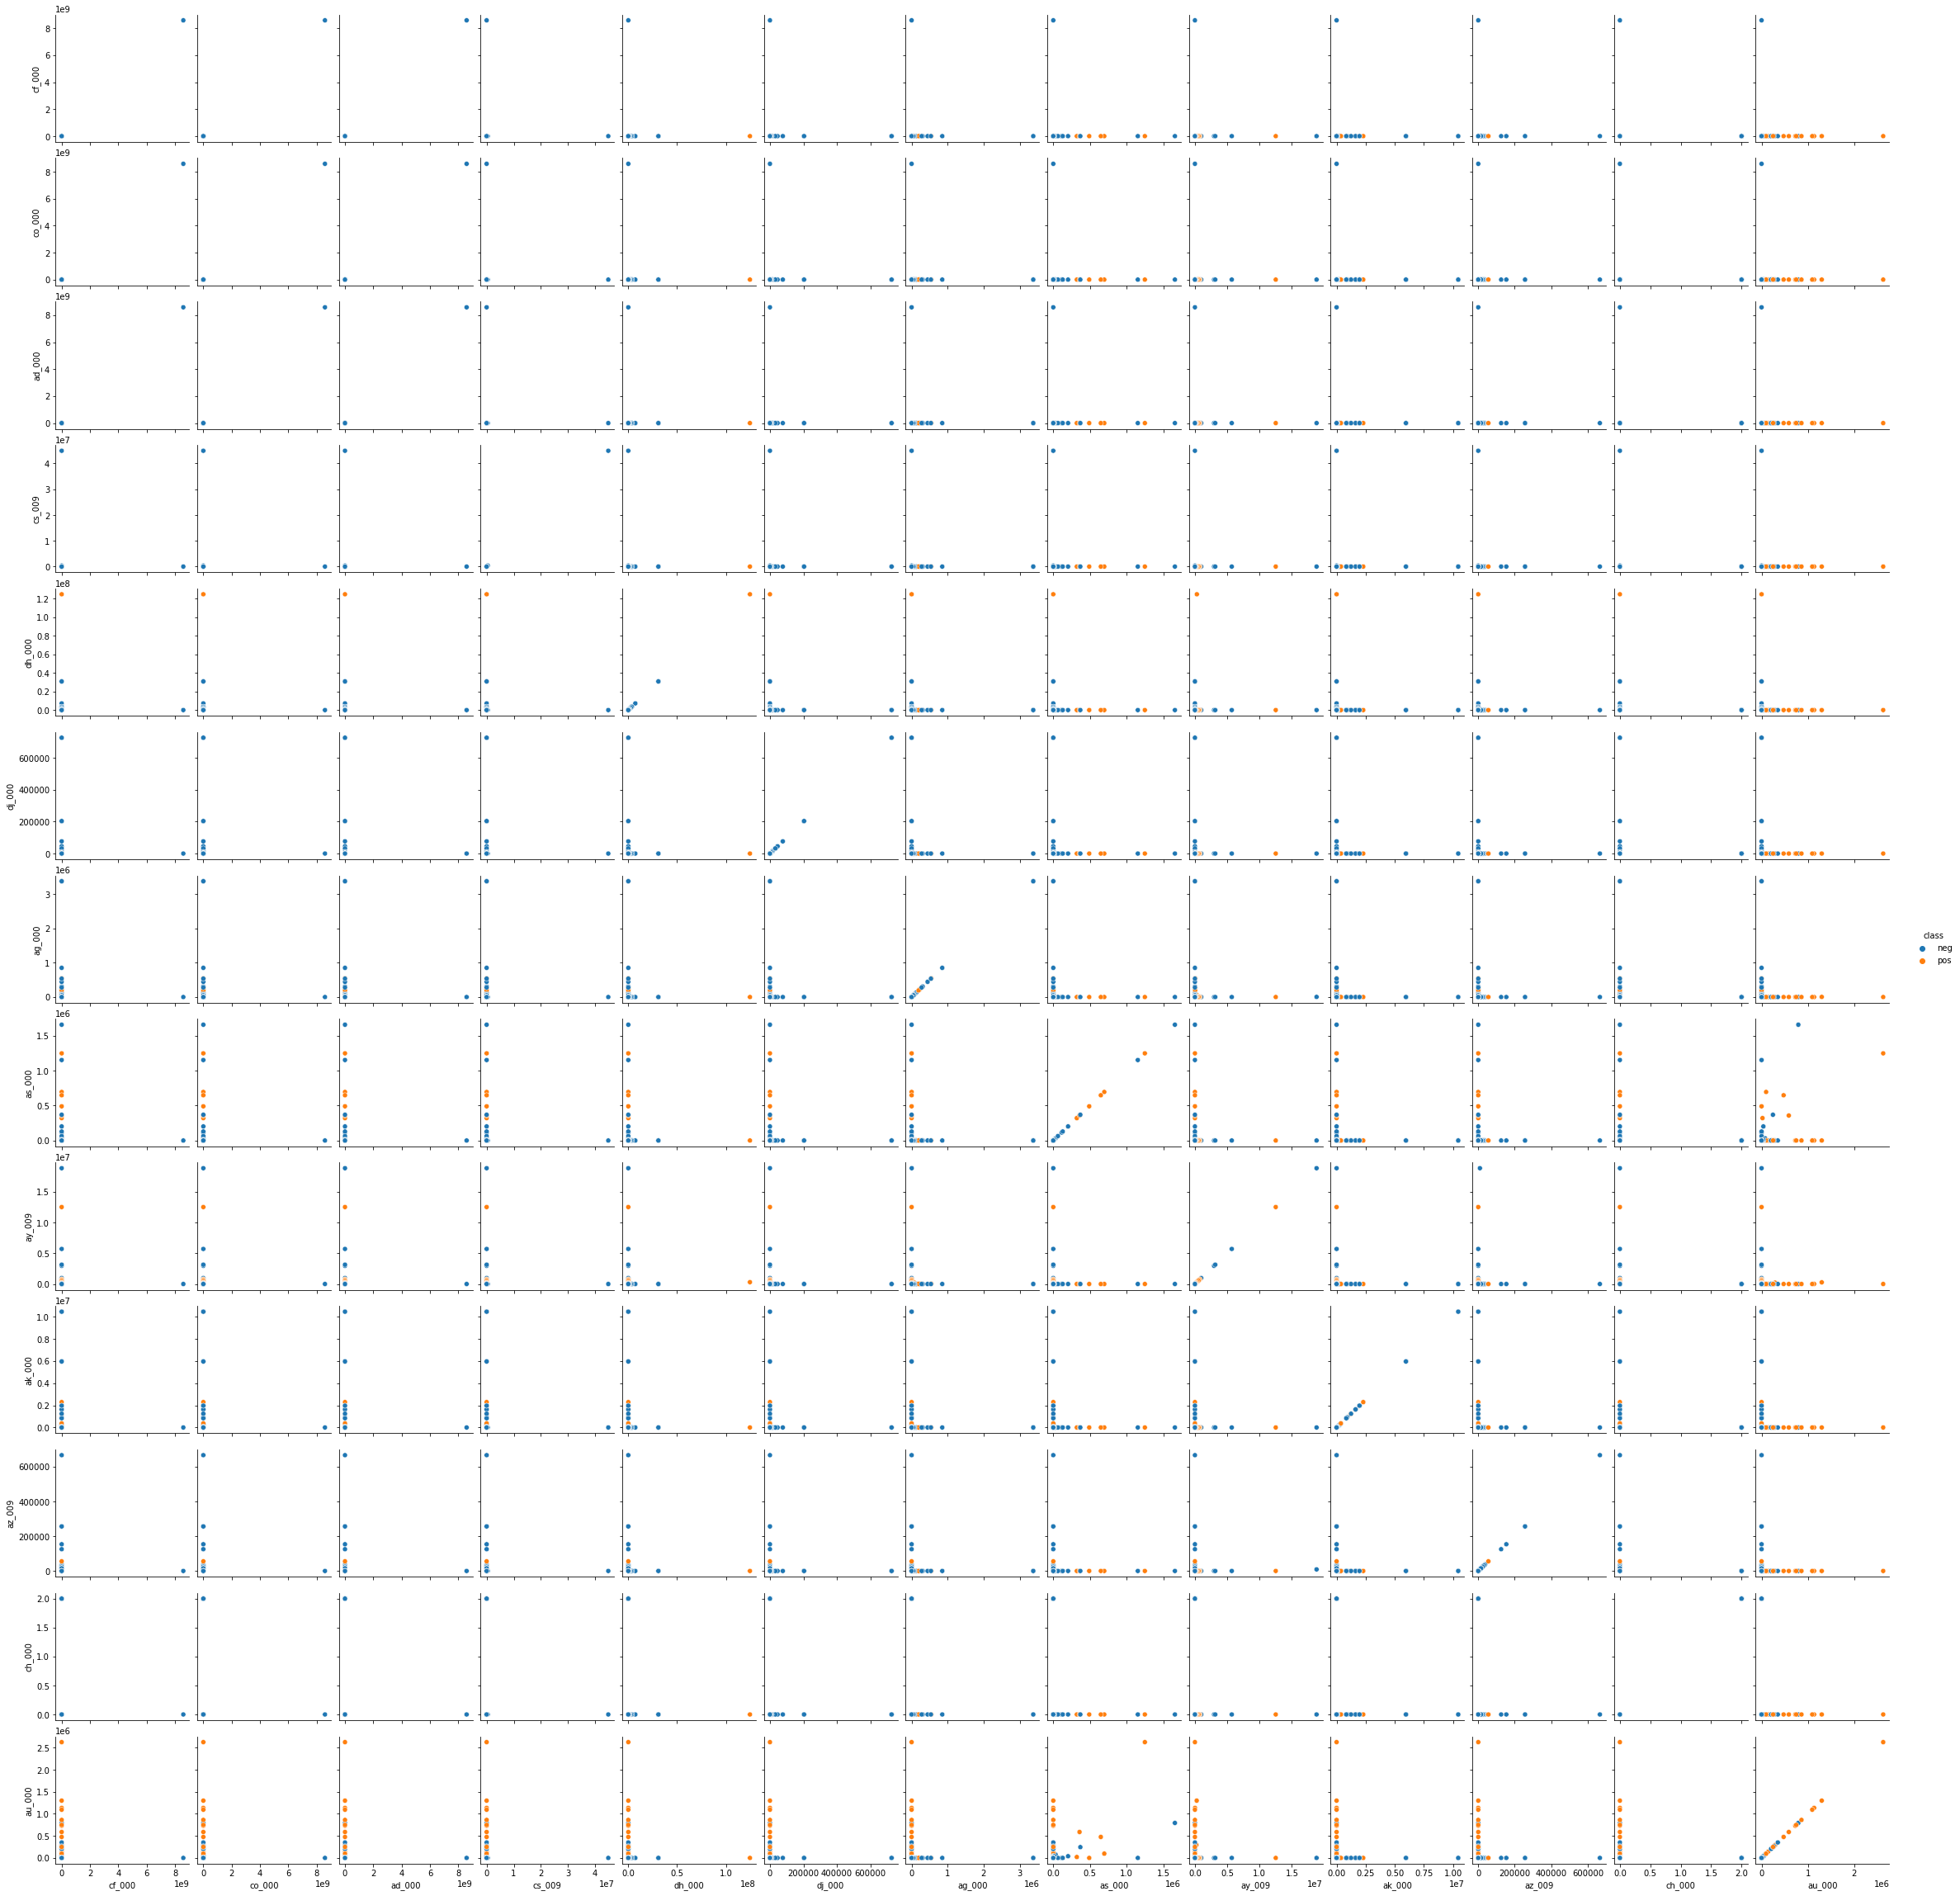

In [ ]:
pp = sbn.pairplot(temp_df,hue="class",height=2.5,diag_kind=None)

In [ ]:
temp_df.columns

Index(['cf_000', 'co_000', 'ad_000', 'cs_009', 'dh_000', 'dj_000', 'ag_000',
       'as_000', 'ay_009', 'ak_000', 'az_009', 'ch_000', 'au_000', 'class'],
      dtype='object')

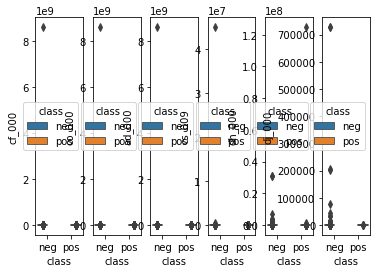

In [ ]:
fig,axes=plt.subplots(1,6)
# fig.legends
b1=sbn.boxplot(y='cf_000',x='class',data=temp_df,ax=axes[0],orient='v',hue= 'class')
b2=sbn.boxplot(y='co_000',x='class',data=temp_df,ax=axes[1],orient='v',hue= 'class')
b3=sbn.boxplot(y='ad_000',x='class',data=temp_df,ax=axes[2],orient='v',hue= 'class')
b4=sbn.boxplot(y='cs_009',x='class',data=temp_df,ax=axes[3],orient='v',hue= 'class')
b5=sbn.boxplot(y='dh_000',x='class',data=temp_df,ax=axes[4],orient='v',hue= 'class')
b6=sbn.boxplot(y='dj_000',x='class',data=temp_df,ax=axes[5],orient='v',hue= 'class')


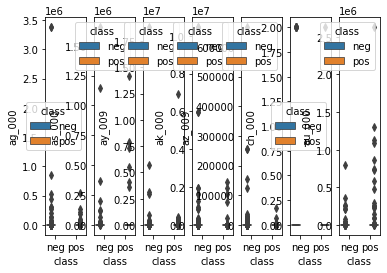

In [ ]:
fig,axes=plt.subplots(1,7)
b7=sbn.boxplot(y='ag_000',x='class',data=temp_df,ax=axes[0],orient='v',hue= 'class')
b8=sbn.boxplot(y='as_000',x='class',data=temp_df,ax=axes[1],orient='v',hue= 'class')
b9=sbn.boxplot(y='ay_009',x='class',data=temp_df,ax=axes[2],orient='v',hue= 'class')
b10=sbn.boxplot(y='ak_000',x='class',data=temp_df,ax=axes[3],orient='v',hue= 'class')
b11=sbn.boxplot(y='az_009',x='class',data=temp_df,ax=axes[4],orient='v',hue= 'class')
b12=sbn.boxplot(y='ch_000',x='class',data=temp_df,ax=axes[5],orient='v',hue= 'class')
b13=sbn.boxplot(y='au_000',x='class',data=temp_df,ax=axes[6],orient='v',hue= 'class')


In [ ]:
print('Q.1.b.v\n')
print(temp_df['class'].value_counts())

Q.1.b.v

neg    59000
pos     1000
Name: class, dtype: int64


In [ ]:
print('Q.1.c\n')

# print(test['class'].value_counts())

Q.1.c



In [ ]:
train=train.replace({'class':{'pos':1,'neg':0}})
test=test.replace({'class':{'pos':1,'neg':0}})
y_train = train['class']
y_actual = test['class']
x_train = train.iloc[:,1:]
y_train = train['class']
x_test = test.iloc[:,1:]
# x_test
y_actual = test['class']
clf = RandomForestClassifier(oob_score=True)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
oob_error = 1 - clf.oob_score_

In [ ]:
# x_test

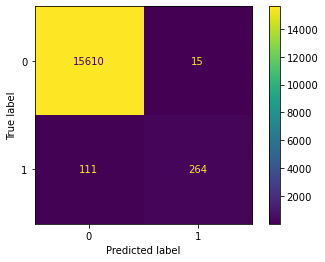

In [ ]:
cm=confusion_matrix(y_actual,y_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

In [ ]:
tn,fp,fn,tp = confusion_matrix(y_actual,y_pred).ravel()
# (tn,fp,fn,tp)
mr = (fp+fn) / (tn+tp+fn+fp)
# print(mr)
print(f'Misclassification rate = {mr*100}%\n')

Misclassification rate = 0.7875%



C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


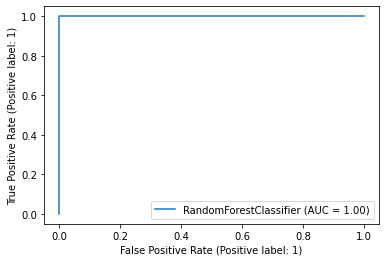

In [ ]:
plot_roc_curve(clf,x_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


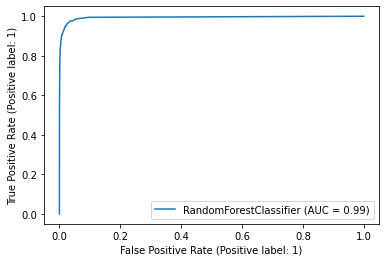

In [ ]:
plot_roc_curve(clf,x_test,y_actual)

AUC = 0.99

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


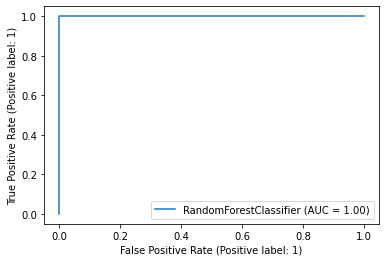

In [ ]:
plot_roc_curve(clf,x_test,y_pred)

In [ ]:
print(f"The test error of the model is {metrics.mean_squared_error(y_actual,y_pred)}\n")
print("The out of bag (OOB) error is: ", oob_error)

The test error of the model is 0.007875

The out of bag (OOB) error is:  0.006333333333333302


Q.1.d
- In order to handle unbalanced classification, we can:
    1. use class_weight parameter while defining the model
    2. use sample_weight parameter while fitting data to the model
    3. Use upsampling / downsampling to rectify class imbalance.

In [ ]:
oversample = SMOTE()
x_train_resample, y_train_resample = oversample.fit_resample(x_train,y_train)
clf_bal = RandomForestClassifier()
clf_bal.fit(x_train_resample,y_train_resample)
y_pred_bal = clf_bal.predict(x_test)


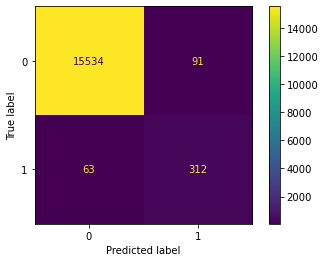

In [ ]:
cm_bal=confusion_matrix(y_actual,y_pred_bal)
cm_bal_display = ConfusionMatrixDisplay(cm_bal)
cm_bal_display.plot()

It can be inferred that the true positive number has incresed but at the cost of reduction in the number of true negatives. Hence, the misclassification rate has increased.

In [ ]:
tn1,fp1,fn1,tp1 = confusion_matrix(y_actual,y_pred_bal).ravel()
# (tn,fp,fn,tp)
mr_bal = (fp1+fn1) / (tn1+tp1+fn1+fp1)
# print(mr)
print(f'Misclassification rate = {mr_bal*100}%\n')

Misclassification rate = 0.9625%



C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


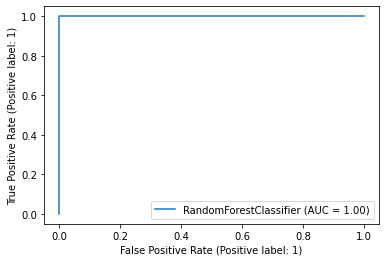

In [ ]:
plot_roc_curve(clf_bal,x_train_resample,y_train_resample)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


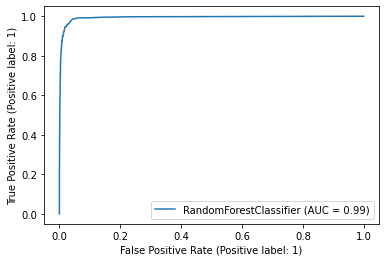

In [ ]:
plot_roc_curve(clf_bal,x_test,y_actual)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


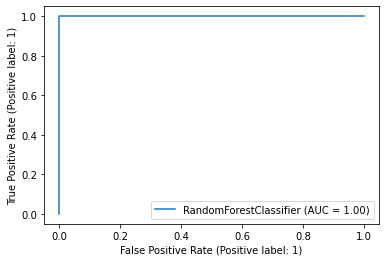

In [ ]:
plot_roc_curve(clf_bal,x_test,y_pred_bal)

In [ ]:
train=train.replace({'class':{'pos':1,'neg':0}})
test=test.replace({'class':{'pos':1,'neg':0}})
y_train = train['class']
y_actual = test['class']

In [ ]:
print('1.e\n')
warnings.filterwarnings(action='ignore')
xgb = XGBClassifier(objective='binary:logistic')
params = {
          'alpha':np.linspace(0.1,1,7)
         }
grid = GridSearchCV(estimator=xgb,param_grid=params,verbose=True)
grid_mod=grid.fit(x_train,y_train,eval_metric='rmse')
# grid_pred = grid_mod.predict(x_test)
print('best_alpha :',grid.best_params_)

1.e

Fitting 5 folds for each of 7 candidates, totalling 35 fits
best_alpha : {'alpha': 0.7}


best_params_ returns a dictionary of paramenters which gives best results on the hold out(validation) data

In [ ]:
warnings.filterwarnings(action='ignore')
best_alpha = 0.7
xg = XGBClassifier(objective='binary:logistic',alpha=best_alpha)
xg.fit(x_train,y_train,eval_metric='rmse')
xg_pred = xg.predict(x_test)

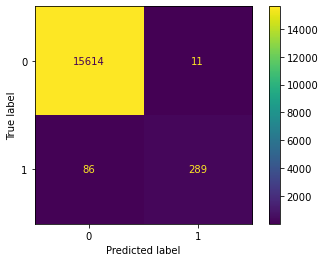

In [ ]:
xg_mat=confusion_matrix(y_actual,xg_pred)
xg_mat_disp = ConfusionMatrixDisplay(xg_mat)
xg_mat_disp.plot()

In [ ]:
tn2,fp2,fn2,tp2 = confusion_matrix(y_actual,xg_pred).ravel()
# (tn,fp,fn,tp)
xg_bal = (fp2+fn2) / (tn2+tp2+fn2+fp2)
# print(mr)
print(f'Misclassification rate = {xg_bal*100}%\n')

Misclassification rate = 0.6062500000000001%



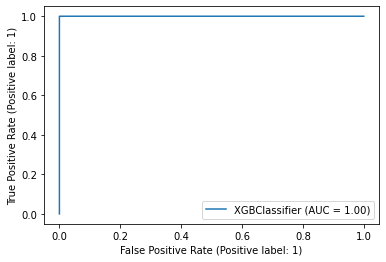

In [ ]:
plot_roc_curve(xg,x_train,y_train)

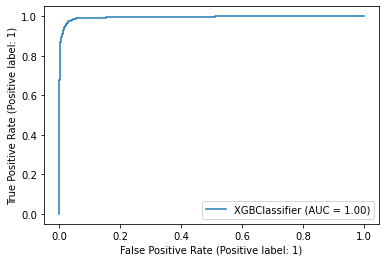

In [ ]:
plot_roc_curve(xg,x_test,y_actual)

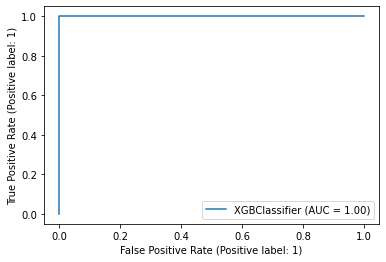

In [ ]:
plot_roc_curve(xg,x_test,xg_pred)

In [ ]:
print(f"The test error of the model is {metrics.mean_squared_error(y_actual,xg_pred)}\n")

The test error of the model is 0.0060625



In [ ]:
print('Q.1.f\n')
oversample = SMOTE()
x_train_resample, y_train_resample = oversample.fit_resample(x_train,y_train)
xgb_smote = XGBClassifier(objective='binary:logistic',alpha=best_alpha)
xgb_smote.fit(x_train_resample,y_train_resample,eval_metric='rmse')
xgb_smote_pred = xgb_smote.predict(x_test)


Q.1.f



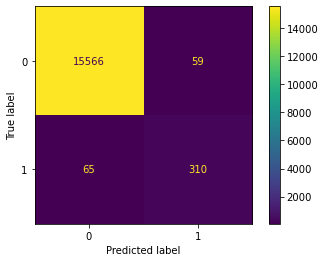

In [ ]:
train=train.replace({'class':{'pos':1,'neg':0}})
test=test.replace({'class':{'pos':1,'neg':0}})
y_train = train['class']
y_actual = test['class']
smote_mat=confusion_matrix(y_actual,xgb_smote_pred)
smote_mat_dis = ConfusionMatrixDisplay(smote_mat)
smote_mat_dis.plot()

In [ ]:
tn3,fp3,fn3,tp3 = confusion_matrix(y_actual,xgb_smote_pred).ravel()
# (tn,fp,fn,tp)
mr3 = (fp3+fn3) / (tn3+tp3+fn3+fp3)
# print(mr)
print(f'Misclassification rate = {mr3*100}%\n')

Misclassification rate = 0.775%



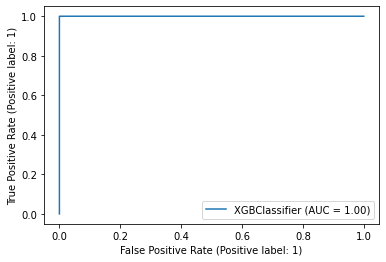

In [ ]:
plot_roc_curve(xgb_smote,x_train_resample,y_train_resample)

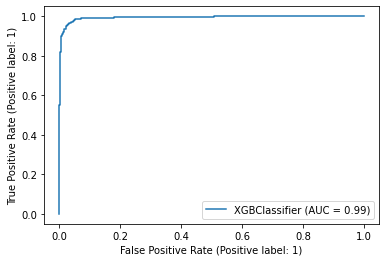

In [ ]:
plot_roc_curve(xgb_smote,x_test,y_actual)

In [ ]:
print(f"The test error of the  SMOTE-XGB model is {metrics.mean_squared_error(y_actual,xgb_smote_pred)}\n")

The test error of the  SMOTE-XGB model is 0.00775



Thus, it can be inferred that the uncompensated model has a lesser test MSE as compared to SMOTE model.

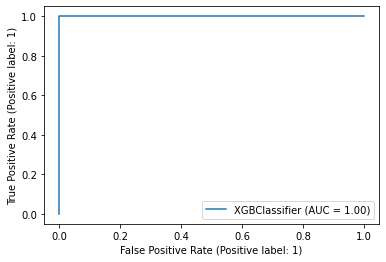

In [ ]:
plot_roc_curve(xgb_smote,x_test,xgb_smote_pred)

![0001.jpg](attachment:0001.jpg)


![0002.jpg](attachment:0002.jpg)

![0003.jpg](attachment:0003.jpg)

![0004.jpg](attachment:0004.jpg)

![0005.jpg](attachment:0005.jpg)

![0006.jpg](attachment:0006.jpg)

![0007.jpg](attachment:0007.jpg)